### paper plots

pretty plots for final paper

In [1]:
!jt -t oceans16 -fs 10 -cellw 93% -nfs 10 -lineh 120 -tfs 10 -dfs 8 -ofs 8 -mathfs 100

In [2]:
import autoencodeSVJ.utils as utils
import autoencodeSVJ.evaluate as ev
import glob
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict as odict
import pandas as pd
import glob
import os
import tensorflow as tf

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

reload(ev)
reload(utils)

Using TensorFlow backend.


<module 'autoencodeSVJ.utils' from '/afs/cern.ch/user/l/llepotti/.local/lib/python2.7/site-packages/autoencodeSVJ/utils.pyc'>

In [3]:
import datetime
ev.update_all_signal_evals()
# ev.get_training_info_dict('training_name')
# ev.check_training('training_name')
# utils.load_summary(utils.summary_by_name('hlf_eflow3_8_v36'))

found 0 trainings total


In [4]:
aucs = ev.load_auc_table()
aucs_old = ev.load_auc_table('TEST')
bdts = pd.read_csv('autoencode/data/bdt_aucs.csv')
bdts = bdts[bdts.columns[1:]].set_index(bdts[bdts.columns[0]].rename('mass'))
bdts = bdts.T.set_index(bdts.T.index.rename('nu')).T
bdts.columns = map(float, bdts.columns)
bdts.index = map(float, bdts.index)

In [5]:
import datetime

s = utils.summary()
# s = s.cdrop(['target_dim', 'signal_path', 'qcd_path', 'range', 'filepath', 'end_time', 'summary_path', 'ae_type', 'time', 'arch', 'hlf', 'input_dim'])
s = s[s.epochs > 10]
s = s[s.norm_percentile == 25]
# s = s[s.time > datetime.datetime(year=2020, month=5, day=20)]
s = s.set_index('filename').sort_index()
a2 = aucs.iloc[:,aucs.columns.isin(s.index)]
s['aucs'] = a2.mean().sort_index()

In [9]:
import math

cols = 3
rows = int(math.ceil(float(len(s))/cols))

# fig, axs = plt.subplots(rows, cols, figsize=(6*cols, 3*rows))

# axs = axs.flatten()

rets = []
for i,elt in enumerate(s.index):
    t = ev.check_training(elt)
#     t.drop('lr', axis=1).plot(ax=axs[i])
    t['lr'] = t.lr/0.1
#     t.plot(ax=axs[i])
    rets.append(t.loss.iloc[-1])
#     axs[i].set_ylim(0.0045, 0.05)
#     axs[i].set_title('{}: {:.4f}'.format(s.loc[elt].time, s.loc[elt].mae_auc), fontsize=18)

# plt.tight_layout()
# plt.show()

s['mse'] = rets

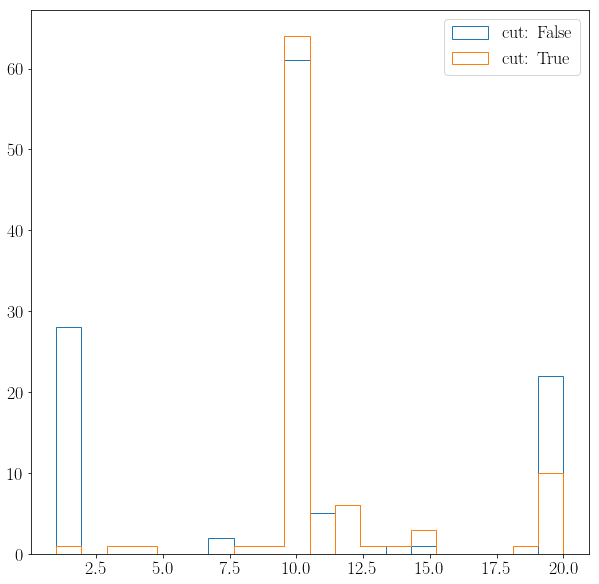

In [17]:
sp = s.copy()
cut = sp.mse < 0.0075

def plot_along_col(data, x, y, col, hist=False):
    for val in data[col].unique():
        elt = data[data[col] == val]
        if hist:
            plt.hist(elt[x], label='{}: {}'.format(col, val), histtype='step', range=(data[x].min(), data[x].max()), bins=20)
        else:
            plt.scatter(elt[x], elt[y], label='{}: {}'.format(col, val))
    plt.legend()
    return plt.gcf()

cp = sp.copy()
cp['cut'] = cut
ax = plot_along_col(cp, 'es_patience', 'aucs', 'cut', hist=True)
# plt.xlim(0, 0.002)
plt.show()

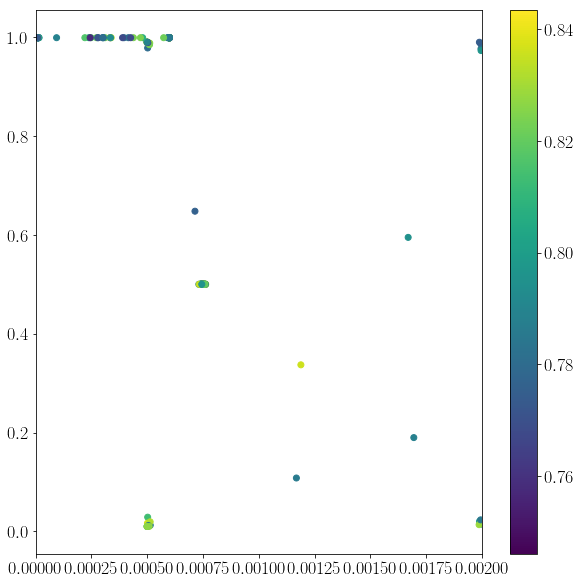

In [14]:
plt.scatter(sp.learning_rate, sp.lr_factor, c=sp.aucs)
plt.colorbar()
plt.xlim(0, .002)
plt.show()

In [18]:
corr = s.drop(['mae_auc', 'mse_auc', 'seed'], axis=1).corr(method='pearson')
corr.loc[~corr.isna().all(axis=0), ~corr.isna().all(axis=1)].round(5)

,batch_size,es_patience,learning_rate,lr_factor,test_split,total_loss,val_split,aucs,mse
batch_size,1.00000,0.06751,-0.30652,0.50620,0.0,0.22065,0.0,-0.18989,0.22258
es_patience,0.06751,1.00000,0.02326,0.07788,0.0,-0.04611,0.0,0.00172,-0.04599
learning_rate,-0.30652,0.02326,1.00000,-0.42634,-0.0,-0.20334,-0.0,0.07047,-0.20806
lr_factor,0.50620,0.07788,-0.42634,1.00000,0.0,0.24049,0.0,-0.20679,0.23909
test_split,0.00000,0.00000,-0.00000,0.00000,1.0,0.00000,1.0,-0.00000,0.00000
total_loss,0.22065,-0.04611,-0.20334,0.24049,0.0,1.00000,0.0,-0.67999,0.99923
val_split,0.00000,0.00000,-0.00000,0.00000,1.0,0.00000,1.0,-0.00000,0.00000
aucs,-0.18989,0.00172,0.07047,-0.20679,-0.0,-0.67999,-0.0,1.00000,-0.68485
mse,0.22258,-0.04599,-0.20806,0.23909,0.0,0.99923,0.0,-0.68485,1.00000


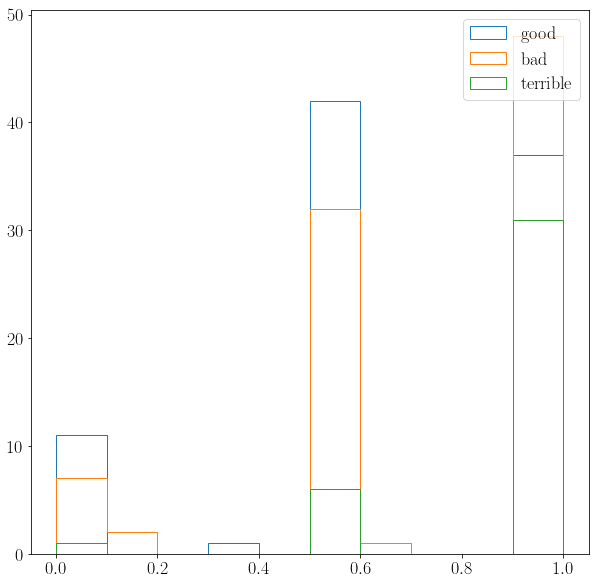

In [19]:
# plt.scatter(s.mse, s.learning_rate)
# plt.show()
hq = 'lr_factor'
rng = (0.0, 1)
plt.hist(s[s.mse < 0.0075][hq], range=rng, bins=10, histtype='step', label='good')
plt.hist(s[(s.mse >= 0.0075) & (s.mse < 0.015)][hq], range=rng, bins=10, histtype='step', label='bad')
plt.hist(s[(s.mse >= 0.015)][hq], range=rng, bins=10, histtype='step', label='terrible')
plt.legend()
plt.show()

## Train final models and interpret

In [ ]:
import time

lr = .00075
lr_factor = 0.5
es_patience = 12
target_dim = 7
batch_size = 32
norm_percentile = 25
epochs = 100

n_models = 10

start_stamp = time.time()

for i in range(n_models):
    mse = ev.ae_train(
        signal_path='data/all_signals/2000GeV_0.15/base_3/*.h5',
        qcd_path='data/background/base_3/*.h5',
        target_dim=target_dim,
        verbose=False,
        batch_size=batch_size,        
        learning_rate=lr,
        norm_percentile=norm_percentile,
        lr_factor=lr_factor,
        es_patience=es_patience,
        epochs=epochs
    )
    print('model 1 finished (mse = {:.4f})'.format(mse))
    print
    
res = utils.summary()
res = res[pd.DatetimeIndex(res.start_time) > datetime.datetime.fromtimestamp(start_stamp)]
best = res.sort_values('total_loss').head(1)
best_name = str(best.filename.values[0])

training under filename 'hlf_eflow3_7_v600'


In [ ]:
# update signal evals
ev.update_all_signal_evals()

In [ ]:
def get_signal_auc_df(aucs, n_avg=1, do_max=False):
    lp = None
    if do_max:
        lp = aucs.max(axis=1).to_frame().reset_index().rename(columns={0:'auc'})
    else:
        lp = aucs.iloc[
            :,np.argsort(aucs.mean()).values[::-1][:n_avg]
        ].mean(axis=1).to_frame().reset_index().rename(columns={0: 'auc'})

    lp['mass'] = lp.mass_nu_ratio.apply(lambda x: x[0])
    lp['nu'] = lp.mass_nu_ratio.apply(lambda x: x[1])
    
    lp = lp.drop('mass_nu_ratio', axis=1).pivot('mass','nu',  'auc')

    return lp
                                                
def plot_signal_aucs_from_lp(lp, n_avg=1, do_max=False, title=None, fac=1.5, barlabel=None, cmap='viridis'):

    plt.figure(figsize=(1.1*fac*6.9,1.1*fac*6))

    plt.imshow(lp, cmap=cmap)
    if barlabel == None:
        barlabel='AUC value'
    cb = plt.colorbar()
    cb.set_label(label=barlabel, fontsize=18*fac)

    plt.xticks(np.arange(0,5,1), map(lambda x: '{:.2f}'.format(x), np.unique(lp.columns)))
    plt.yticks(np.arange(0,6,1), np.unique(lp.index))
    
    if title is not None:
        plt.title(title, fontsize=fac*25)
    elif do_max:
        plt.title('Best AUCs (for any autoencoder)', fontsize=fac*25)
    elif n_avg < 2:
        plt.title('Signal AUCs (best autoencoder)', fontsize=fac*25)
    else:
        plt.title('Average Signal AUCs (best {} models)'.format(n_avg), fontsize=fac*25)
    plt.ylabel(r'$M_{Z^\prime}$ (GeV)', fontsize=fac*20)
    plt.xlabel(r'$r_{inv}$', fontsize=fac*20)
    plt.xticks(fontsize=18*fac)
    plt.yticks(fontsize=18*fac)

    for mi,(mass,row) in enumerate(lp.iterrows()):
        for ni,(nu,auc) in enumerate(row.iteritems()):
            plt.text(ni, mi, '{:.3f}'.format(auc), ha="center", va="center", color="w", fontsize=18*fac)

    return plt.gca()
                                                
def plot_signal_aucs(aucs, n_avg=1, do_max=False, title=None, fac=1.5, cmap='viridis'):
    lp = get_signal_auc_df(aucs, n_avg, do_max)
    return lp, plot_signal_aucs_from_lp(lp, n_avg, do_max, title, fac, cmap=cmap)                                    

In [ ]:
aucs = ev.load_auc_table()
bdts = pd.read_csv('autoencode/data/bdt_aucs.csv')
bdts = bdts[bdts.columns[1:]].set_index(bdts[bdts.columns[0]].rename('mass'))
bdts = bdts.T.set_index(bdts.T.index.rename('nu')).T
bdts.columns = map(float, bdts.columns)
bdts.index = map(float, bdts.index)

In [ ]:
plot_signal_aucs_from_lp(bdts, title='BDT AUCs (trained on each signal)')

In [ ]:
best,ax = plot_signal_aucs(aucs[best_name].to_frame(), title='Autoencoder AUCs')

In [ ]:
overall,ax = plot_signal_aucs(aucs, do_max=True)

In [ ]:
diff = (bdts - best) / ((bdts + best)/2.)*100.
ax = plot_signal_aucs_from_lp(diff, title='\% Difference, AE and BDT AUCs', barlabel='', cmap='viridis_r')
ax.images[-1].colorbar.remove()
cb = plt.colorbar(ticks=range(2,10))
cb.ax.set_yticklabels(['{}\%'.format(x) for x in range(3,10)])

plt.tight_layout()
plt.show()

In [ ]:
from mpl_toolkits import mplot3d


arr_to_3d = diff.copy()
x, y, z, = np.asarray(pd.melt(arr_to_3d.reset_index(), id_vars='index').values).astype(float).T

fig = plt.figure()
# x = np.tile(varc.index, [len(varc.columns),1,]).T
# y = np.tile(varc.columns, [len(varc.index),1])
# z = varc.values
ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap='viridis')
ax.view_init(45, 270 + 30)
ax.set_xlabel(r'$Z^\prime$ mass (GeV)')
ax.set_ylabel(r'$r_{inv}$')
ax.set_zlabel(r'\% Difference')
plt.show()

In [ ]:
def histby(aucs, category, bins=20, lines=False, stacked=False, histtype='step', alpha=1, cat_name=None):
    if cat_name is None:
        cat_name = category
    tab = aucs.reset_index()
    cats = ['mass', 'nu']
    tab['mass'] = tab.mass_nu_ratio.map(lambda x: x[0])
    tab['nu'] = tab.mass_nu_ratio.map(lambda x: x[1])
    tab = tab.drop('mass_nu_ratio', axis=1)
    
    tab = tab.drop([m for m in cats if m != category], axis=1)
    groups = tab.groupby(category).apply(lambda x: x.values.flatten())
    
    
    rng = aucs.values.min(), aucs.values.max() 
    if stacked:
        histtype=None
    
    if lines:
        vals = np.linspace(rng[0], rng[1], bins + 1)
        cnts = np.asarray([np.histogram(g, bins=vals)[0] for g in np.asarray(groups.values)])
        
        x = vals[:-1] + np.diff(vals)/2
        ys = np.asarray(cnts)
        for y,label in zip(ys, groups.index):
            plt.plot(x, y, label=label)
        plt.legend(title=cat_name)
        
        return plt.gca()

    rets = plt.hist(np.asarray(groups.values), bins=bins, range=rng, stacked=stacked, alpha=alpha, histtype=histtype, label=[val for val in groups.index])
    plt.legend(title=cat_name)
    return plt.gca()


In [ ]:
fac = 1.5
ax = histby(aucs, 'nu', lines=False, alpha=1, histtype='step', bins=80, cat_name='$r_{inv}$')
lg = plt.legend(fontsize=12*fac, title=r'$r_{inv}$')
lg.get_title().set_fontsize(20*fac) 
plt.title('AUC Distributions for all Trainings\n(grouped by $r_{inv}$)', fontsize=25*fac)
plt.ylabel('Count', fontsize=20*fac)
plt.xlabel('AUC', fontsize=20*fac)
plt.xticks(fontsize=18*fac)
plt.yticks(fontsize=18*fac)
plt.show()

In [ ]:
ax = histby(aucs, 'mass', lines=True, alpha=1, histtype='step', bins=15, cat_name='$M_{Z^+}$')
plt.title('AUC distributions for signals over all trainings, grouped by $M_{Z^\prime}$')
plt.show()

In [ ]:
import scipy.stats

def plot_nu_vs_aucs(aucs, n=None):

    sort = aucs.loc[:,aucs.mean().sort_values()[::-1].index]
    # c = 5
    if n is None:
        n = len(sort.columns)
        
    subset = sort.iloc[:,:n]
    
    means = subset.mean(axis=1)
    mid = np.percentile(aucs, 50, axis=1)
    lower = mid - np.percentile(aucs, 75, axis=1)
    upper = np.percentile(aucs, 25, axis=1) - mid
    bars = np.asarray([upper, lower]).T
    
    
    masses, nus = np.asarray(map(np.asarray, means.index)).T
    mean_vals = means.values

    
    plt.figure(figsize=(12,9))
    
    for mass in sorted(set(masses)):
        idx = masses == mass
        
        plt.errorbar(nus[idx], mean_vals[idx], marker='o', yerr=bars[idx].T, label='{} GeV'.format(mass), capsize=8.0, alpha=0.6)
        
    
    plt.xlabel('Nu Fraction')
    plt.ylabel('Average AUC')
    plt.xticks(np.unique(nus))
    plt.legend(title=r'$Z^{\prime}$ Mass')
    plt.title('')
    plt.show()
#     return means, lower, upper
    
plot_nu_vs_aucs(aucs)

In [ ]:
def plot_mass_vs_aucs(aucs, n=None):
    
    sort = aucs.loc[:,aucs.mean().sort_values()[::-1].index]
    # c = 5
    if n is None:
        n = len(sort.columns)
        
    subset = sort.iloc[:,:n]
    
    means = subset.mean(axis=1)
    mid = np.percentile(aucs, 50, axis=1)
    lower = mid - np.percentile(aucs, 75, axis=1)
    upper = np.percentile(aucs, 25, axis=1) - mid
    bars = np.asarray([upper, lower]).T
    
    
    masses, nus = np.asarray(map(np.asarray, means.index)).T
    mean_vals = means.values
    
    plt.figure(figsize=(12,9))
    
    for nu in sorted(set(nus)):
        idx = nus == nu
        plt.errorbar(masses[idx], mean_vals[idx], marker='o', yerr=bars[idx].T, label='{}'.format(nu), capsize=8.0, alpha=0.6)
        
    plt.xlabel('Mass (GeV)')
    plt.ylabel('Average AUC')
    plt.xticks(np.unique(masses))
    plt.legend(title=r'$r_{inv}$')
    plt.title('Signal $Z^\prime$ mass vs. Average AUC (top {} AEs)'.format(n))
    plt.tight_layout()
    plt.show()
    
plot_mass_vs_aucs(aucs)

# important
`data_holder` basically loads all signal data into memory at once, while `auc_getter` gets and generates errors, reconstructed data, and normalized data on a gievn training run. Both of these things are critical to the later plotting

In [ ]:
reload(ev)

In [ ]:
eflow_base = 3

dholder = ev.data_holder(
    qcd='data/background/base_3/*.h5',
    **{os.path.basename(p): '{}/base_{}/*.h5'.format(p, eflow_base) for p in glob.glob('data/all_signals/*')}
)

dholder.load()
dists = {v.name: v for v in dholder.get('data')}

# signal = utils.data_table(pd.concat([v.df for v in dists.values() if v.name.startswith('Zprime')]), name='Z^+ Dark (Average)')
qcd = dists['qcd']


In [ ]:
dists_subset = [v for v in dists.values() if v.name.startswith('Zprime')]
size = min(map(len, dists_subset))
signal = utils.data_table(pd.concat([v.df.iloc[:size] for v in dists_subset]), name='Z^+ Dark (Average)')
signal_combined = pd.concat([pd.concat([v.df, pd.Series(np.repeat(k, len(v)), name='key')], axis=1) for k,v in dists.items() if k.startswith('Zprime')])
sc = signal_combined

sc['mass'] = sc.key.apply(lambda x: int(x.split('_')[1].rstrip('GeV')))
sc['nu'] = sc.key.apply(lambda x: float(x.split('_')[-1])/100.)
# sc.head()

In [ ]:
def mae_minus_etaphi(true, pred):
    return np.abs((true[:,2:] - pred[:,2:])).mean(axis=1)


tf.reset_default_graph()
agetter = ev.auc_getter(best_name, times=True)
agetter.update_event_range(dholder, percentile_n=1)
test = agetter.get_test_dataset(dholder)
norm, errors, recon = agetter.get_errs_recon(dholder, names=['mae', 'mse', 'mae_minus_etaphi'], functions=['mae', 'mse', mae_minus_etaphi])
aucs_ = agetter.get_aucs(errors, metrics=['mae', 'mse', 'mae_minus_etaphi'])
fmt = agetter.auc_metric(aucs_)

signal_recon = utils.data_table(pd.concat([v.df.iloc[:size] for v in recon.values() if v.name.startswith('Zprime')]), name='Z^+ Dark (Average) pred')
signal_norm = utils.data_table(pd.concat([v.df.iloc[:size] for v in norm.values() if v.name.startswith('Zprime')]), name='Z^+ Dark (Average)')
signal_err = utils.data_table(pd.concat([v.df.iloc[:size] for v in errors.values() if v.name.startswith('Zprime')]), name='Z^+ Dark (Average)')

In [ ]:
styles = {
    'Z': {
        'facecolor': 'm',
        'histtype': 'step',
        'fill': True,
        'edgecolor': 'k',
        'label': r'SVJ',
        'alpha': 0.4,
#         'hatch': '/'
    },
    'qcd': {
        'facecolor': 'y',
        'histtype': 'step',
        'fill': True,
        'edgecolor': 'k',
        'label': r'QCD',
        'alpha': 0.4

    },
    'ttbar': {
        'facecolor': 'C0',
        'label': r'$t\bar{t}$',
        'edgecolor': 'w',
        'hatch': '//',
        'fill': True,
        'histtype': 'step',
        'alpha': 0.4

    }
}

order = [
    'ttbar',
    'Z',
    'qcd'
]


var_styles = {
    'ChargedFraction': {
        'xlabel': r'Charged Fraction',
        'fontsize': 20,
    },
    'Pt': {
        'xlabel': r'$\displaystyle p_{T}$',
        'fontsize': 20,
        'range': (0., 2000.),
    },
    'Eta': {
        'xlabel': r'$\displaystyle \eta$',
        'fontsize': 20,
#         'range': (0., 0.7),
    },
    'Phi': {
        'xlabel': r'$\displaystyle \phi$',
        'fontsize': 20,
#         'range': (0., 0.7),
    },
    'M': {
        'xlabel': 'Mass',
        'fontsize': 20,
        'range': (0., 500.)
    },
    'mae': {
        'xlabel': 'Reconstruction Error (MAE)',
        'fontsize': 30,
    },
    'mse': {
        'xlabel': 'Reconstruction Error (MSE)',
        'fontsize': 30,
    },
    'mae_minus_etaphi': {
        'xlabel': 'Reconstruction Error (MAE - eta/phi)',
        'fontsize': 30,
    },
    'PTD': {
        'xlabel': 'PTD',
        'fontsize': 20,
    },
    'Axis2': {
        'xlabel': 'Axis_2',
        'fontsize': 20,
        'range': (0, 0.2)
    }
}

# more than needed
for i in range(100):
    var_styles['eflow {}'.format(i)] = {}
    var_styles['eflow {}'.format(i)]['xlabel'] = "Variable {}".format(i)
    var_styles['eflow {}'.format(i)]['fontsize'] = 20

eflow_ranges = {
    1: (0,0.6),
    2: (0,0.5),
    3: (0,0.4),
    4: (0,0.4),
    5: (0,0.25),
    6: (0,0.15),
    7: (0,0.2),
    8: (0,0.15),
    9: (0,0.3),
    10: (0,0.2),
    11: (0,0.15),
    12: (0,0.15)
}

for num,rng in eflow_ranges.items():
    var_styles['eflow {}'.format(num)]['range'] = rng

### Pre-use histograms

Thing to convert data into column-based shit:

In [ ]:
from collections import OrderedDict

def converter(toplot): 
    colsets = [tuple(x.columns) for x in toplot.values()]
    assert(len(set(colsets)) == 1)
    var = colsets[0]

    names = sorted(toplot.keys())

    out = OrderedDict()
    for name in names:
        for v in var:
            if v not in out:
                out[v] = OrderedDict()
            out[v][name] = toplot[name][v]

    return out

In [ ]:
data = converter({'Z': signal, 'qcd': test})

bins=50
names="*"
ylabel=None
normed=1
xlog=False
ylog=False
pileup=False
m1 = 20./4.
m2 = 14./3.


fs = 18
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['xtick.labelsize']=fs
plt.rcParams['ytick.labelsize']=fs
matplotlib.rcParams.update({'font.size': 18})

rows, cols = (6,4)
f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
axs = axs.flatten()
#     f.suptitle("Input Variables", y=1.02, fontsize=30)
ogbins = bins
i = 0
for d,v in data.items():
    var_style = var_styles[d].copy()

    if 'bins' in var_style:
        bins = var_style.pop('bins')
    else:
        bins = ogbins

    if 'range' in var_style:
        rng = var_style.pop('range')
    else:
        rng = map(lambda f: f(map(f, v.values())), [min, max])
    ax = axs[i]

    if 'Variable' in var_style['xlabel']:
        var_style['xlabel'] = "EFP " + var_style['xlabel'] 
#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
    for k in v.keys():

        datum = v[k]

        if pileup:
            datum[datum < rng[0]] = rng[0]
            datum[datum > rng[1]] = rng[1]
        nbins = bins
        if xlog:
            nbins = np.geomspace(rng[0], rng[1], bins)

        style = styles[k].copy()

#             style['alpha'] = 0.3
        ax.hist(datum, range=rng, bins=nbins, normed=normed, **style)


        ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
        if xlog:
            ax.set_xscale('log')
        if ylog:
            ax.set_yscale('log', nonposy='clip')
        if ylabel is not None:
            ax.set_ylabel(ylabel)

    i += 1

handles,labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc=(0.8, 0.1), fontsize=40)
for x in axs[i:]:
    f.delaxes(x)


### Post-all

In [ ]:
data = converter({
    'Z pred': signal_recon,
    'qcd pred': recon['qcd pred'],
    'Z': signal, 
    'qcd': test
})

bins=50
names="*"
ylabel=None
normed=1
xlog=False
ylog=False
pileup=False
m1 = 20./4.
m2 = 14./3.

recon_kwd = 'pred'
# dists = e.dists_dict.copy()
# dists['qcd'] = e.test
# data = plotdata({recon_kwd : e.recons_dict, 'NONE': dists}, names=names)

fs = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['xtick.labelsize']=fs
plt.rcParams['ytick.labelsize']=fs
matplotlib.rcParams.update({'font.size': 18})

rows, cols = (6,4)
f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
axs = axs.flatten()
# f.suptitle("Feature Reconstructions", y=1.02, fontsize=30)
ogbins = bins
i = 0

for da,v in data.items():
    
    var_style = var_styles[da].copy()
    if 'Variable' in var_style['xlabel']:
        var_style['xlabel'] = "EFP " + var_style['xlabel'] 
    
    if 'bins' in var_style:
        bins = var_style.pop('bins')
    else:
        bins = ogbins

    if 'range' in var_style:
        rng = var_style.pop('range')

    else:
        rng = map(lambda f: f(map(f, v.values())), [min, max])
    ax = axs[i]

#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
    for k in v.keys():

        datum = v[k]
        reconstructed = False
        kp = k 
        if recon_kwd in k:
            reconstructed = True 

            kp = k.replace(recon_kwd, '').strip()

        if pileup:
            datum[datum < rng[0]] = rng[0]
            datum[datum > rng[1]] = rng[1]
        nbins = bins
        if xlog:
            nbins = np.geomspace(rng[0], rng[1], bins)

        style = styles[kp].copy()

#             style['alpha'] = 0.3
        if reconstructed:
            hist,bins = np.histogram(datum, range=rng, bins=nbins, normed=normed)

            style['color'] = style['facecolor']
            style['linewidth'] = 2
            style['label'] = style['label'] + ', (pred)'
            for var in ['histtype', 'fill', 'facecolor', 'edgecolor', 'hatch', 'alpha']:
                if var in style:
                    style.pop(var)

            ax.plot(bins[:-1] + np.diff(bins)/2., hist, marker='+', alpha=1, **style)
#                 ax.scatter(bins[:-1] + np.diff(bins)/2., hist, marker='+', edgecolor='k', **style)
        else:
            ax.hist(datum, range=rng, bins=nbins, normed=normed, **style)

        ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
        if xlog:
            ax.set_xscale('log')
        if ylog:
            ax.set_yscale('log', nonposy='clip')
        if ylabel is not None:
            ax.set_ylabel(ylabel)

    i += 1

handles,labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc=(.7825,.1), fontsize=33)
for x in axs[i:]:
    f.delaxes(x)

In [ ]:
data = converter({
    'Z pred': signal_recon,
    'qcd pred': recon['qcd pred'],
    'Z': signal, 
    'qcd': test
})

bins=50
names="*"
ylabel=None
normed=1
xlog=False
ylog=False
pileup=False
m1 = 19./4.
m2 = 14./3.

recon_kwd = 'pred'
# dists = e.dists_dict.copy()
# dists['qcd'] = e.test
# data = plotdata({recon_kwd : e.recons_dict, 'NONE': dists}, names=names)

fs = 20
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['xtick.labelsize']=fs
plt.rcParams['ytick.labelsize']=fs
matplotlib.rcParams.update({'font.size': 18})

rows, cols = (6,4)
f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
axs = axs.flatten()
# f.suptitle("Feature Reconstructions", y=1.02, fontsize=30)
ogbins = bins
i = 0

for da,v in data.items():
    
    var_style = var_styles[da].copy()
    if 'Variable' in var_style['xlabel']:
        var_style['xlabel'] = "EFP " + var_style['xlabel'] 
    
    if 'bins' in var_style:
        bins = var_style.pop('bins')
    else:
        bins = ogbins

    if 'range' in var_style:
        rng = var_style.pop('range')

    else:
        rng = map(lambda f: f(map(f, v.values())), [min, max])
    ax = axs[i]

#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
    for k in v.keys():

        datum = v[k]
        reconstructed = False
        kp = k 
        if recon_kwd in k:
            reconstructed = True 

            kp = k.replace(recon_kwd, '').strip()

        if pileup:
            datum[datum < rng[0]] = rng[0]
            datum[datum > rng[1]] = rng[1]
        nbins = bins
        if xlog:
            nbins = np.geomspace(rng[0], rng[1], bins)

        style = styles[kp].copy()

#             style['alpha'] = 0.3
        if reconstructed:
            hist,bins = np.histogram(datum, range=rng, bins=nbins, normed=normed)

            style['color'] = style['facecolor']
            style['linewidth'] = 2
            style['label'] = style['label'] + ', (pred)'
            for var in ['histtype', 'fill', 'facecolor', 'edgecolor', 'hatch', 'alpha']:
                if var in style:
                    style.pop(var)

            ax.plot(bins[:-1] + np.diff(bins)/2., hist, marker='+', alpha=1, **style)
#                 ax.scatter(bins[:-1] + np.diff(bins)/2., hist, marker='+', edgecolor='k', **style)
        else:
            ax.hist(datum, range=rng, bins=nbins, normed=normed, **style)

        var_style['fontsize'] = 30
        ax.set_xlabel(**(var_style))
        
#             ax.set_yscale('log')
        if xlog:
            ax.set_xscale('log')
        if ylog:
            ax.set_yscale('log', nonposy='clip')
        if ylabel is not None:
            ax.set_ylabel(ylabel)
        ax.set_yticklabels([])

    i += 1

handles,labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc=(.7825,.1), fontsize=33)
for x in axs[i:]:
    f.delaxes(x)

In [ ]:
loss_to_use = 'mse'
loss_range = (0, 0.05)

In [ ]:
import random

N0 = 12000

# N = 6*N0/5


keys = errors.keys()
keys.remove('qcd')
keys = pd.DataFrame(keys, columns=['key'])
keys['nu'] = keys.key.apply(lambda x: x.split('_')[-1]).astype(float)/100.
keys['mass'] = keys.key.apply(lambda x: x.split('_')[-2].replace('GeV', '')).astype(int)
se_idx = random.sample(list(set(signal_err.index)), N0/6)

newdata = {}
for nu, gp in keys.groupby('nu').key:
     newdata[nu] = pd.concat([errors[k].df.loc[se_idx] for k in gp])
    

# se_idx = random.sample(list(set(signal_err.index)), N//30)
qe_idx = random.sample(range(len(errors['qcd'])), N0)

inp = {'qcd': errors['qcd'].iloc[qe_idx]}
inp.update(newdata)
data = converter(inp)
for k in data.keys():
    if k != loss_to_use:
        data.pop(k)

bins=40
ylabel=None
normed=0
xlog=False
ylog=True
pileup=False
rng=loss_range

#     recon_kwd = '(Reconstructed)'
#     data = plotdata(e.errs_dict, names=names, drop=drop)

fs = 18
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['xtick.labelsize']=fs
plt.rcParams['ytick.labelsize']=fs
matplotlib.rcParams.update({'font.size': 30})

#     rows, cols = (1,1)
f, ax = plt.subplots(1, 1, figsize=(2*m1, 2*m2))

#     f.suptitle("Input Variables", y=1.02, fontsize=30)
ogbins = bins

stack = []
for d,v in data.items():
    if 'bins' in var_styles[d]:
        bins = var_styles[d].pop('bins')
    else:
        bins = ogbins

    if 'range' in var_styles[d]:
        rng = var_styles[d].pop('range')
    elif rng is None:
        rng = map(lambda f: f(map(f, v.values())), [min, max])


#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
       
    for k in v.keys():

        datum = v[k]

        if pileup:
            datum[datum < rng[0]] = rng[0]
            datum[datum > rng[1]] = rng[1]
        nbins = bins
        if xlog:
            nbins = np.geomspace(rng[0], rng[1], bins)

        if k in styles:
            style = styles[k].copy()
            ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)
        else:
            ax.hist(datum, range=rng,bins=nbins, normed=normed, label=r'SVJ, $r_{inv} = ' + '{}$'.format(str(k)), histtype='step')
            stack.append(np.histogram(datum, range=rng, bins=nbins, normed=normed))
            
        var_style = var_styles[d].copy()
        if 'Variable' in var_style['xlabel']:
            var_style['xlabel'] = "EFP " + var_style['xlabel'] 

        ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
        if xlog:
            ax.set_xscale('log')
        if ylog:
            plt.ylim(1e1,1e4)

            ax.set_yscale('log', nonposy='clip')
        if ylabel is not None:
            ax.set_ylabel(ylabel)

# ax.set_ylabel('Arbitrary Units')
# ax.set_yticklabels([])
# plt.yscale('log')

handles,labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc=(.62,.56), fontsize=22)
plt.title('Reconstruction Error\n($N$ = {} Events/Class)'.format(N0))
plt.ylabel('Count')



In [ ]:
N = 12000

se_idx = random.sample(range(len(signal_err.index)), N)
qe_idx = random.sample(range(len(errors['qcd'])), N)
data = converter({'Z': signal_err.iloc[se_idx], 'qcd': errors['qcd'].iloc[qe_idx]})
for k in data.keys():
    if k != loss_to_use:
        data.pop(k)
# print(data['mae']['Z'].max())
bins=50
ylabel=None
normed=0
xlog=False
ylog=True
pileup=False
rng=loss_range
split=True

#     recon_kwd = '(Reconstructed)'
#     data = plotdata(e.errs_dict, names=names, drop=drop)

fs = 18
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams['xtick.labelsize']=fs
plt.rcParams['ytick.labelsize']=fs
matplotlib.rcParams.update({'font.size': 30})

#     rows, cols = (1,1)
f, ax = plt.subplots(1, 1, figsize=(2*m1, 2*m2))

#     f.suptitle("Input Variables", y=1.02, fontsize=30)
ogbins = bins

for d,v in data.items():
    if 'bins' in var_styles[d]:
        bins = var_styles[d].pop('bins')
    else:
        bins = ogbins

    if 'range' in var_styles[d]:
        rng = var_styles[d].pop('range')
    elif rng is None:
        rng = map(lambda f: f(map(f, v.values())), [min, max])


#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
       
    for k in v.keys():

        datum = v[k]

        if pileup:
            datum[datum < rng[0]] = rng[0]
            datum[datum > rng[1]] = rng[1]
        nbins = bins
        if xlog:
            nbins = np.geomspace(rng[0], rng[1], bins)

        style = styles[k].copy()

#             style['alpha'] = 0.3
        ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)

        var_style = var_styles[d].copy()
        if 'Variable' in var_style['xlabel']:
            var_style['xlabel'] = "EFP " + var_style['xlabel'] 

        ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
        if xlog:
            ax.set_xscale('log')
        if ylog:
            plt.ylim(1e1,1e4)

            ax.set_yscale('log', nonposy='clip')
        if ylabel is not None:
            ax.set_ylabel(ylabel)

# ax.set_ylabel('Arbitrary Units')
# ax.set_yticklabels([])
# plt.yscale('log')
handles,labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc=(.7,.71), fontsize=30)
plt.title('Reconstruction Error\n($N$ = {} Events/Class)'.format(N))
plt.ylabel('Count')



In [ ]:
# fig,axes = plt.subplots(5, 4, figsize=(20,20))

# srecon = np.abs(signal_recon.reset_index(drop=True) - signal.reset_index(drop=True))
# qrecon = np.abs(test.reset_index(drop=True) - recon['qcd pred'].reset_index(drop=True))

# cols = srecon.columns
# cnt = 0
# for i in range(len(axes)):
#     for j in range(len(axes[i])):
#         if cnt >= len(cols):
#             break
#         ax = axes[i,j]
        
#         c = cols[cnt]
#         scol = srecon[c].values
#         qcol = qrecon[c].values
        
#         rng = min([scol.min(), qcol.max()]), max([scol.max(), qcol.max()])
#         ax.hist(scol, range=rng, bins=40, color='red', histtype='step', normed=True)
#         ax.hist(qcol, range=rng, bins=40, color='blue', histtype='step', normed=True)
#         ax.set_xlabel(c)
#         ax.set_yscale('log')

#         #.hist(ax=ax, bins=40, color='blue', histtype='step')
#         cnt += 1

# ax.hist([], range=rng, bins=40, color='red', histtype='step', label='svj')
# ax.hist([], range=rng, bins=40, color='blue', histtype='step', label='qcd')
# axes[i,j].hist(srecon.mean(axis=1), range=(0,100), color='red', histtype='step', bins=40, normed=1)
# axes[i,j].hist(qrecon.mean(axis=1), range=(0,100), color='blue', histtype='step', bins=40, normed=1)
# plt.legend()
# plt.show()

In [ ]:
import sklearn.metrics

se = signal_err
qe = errors['qcd']

# sklearn.metrics.auc(se qe)

In [ ]:
maeroc = utils.roc_auc_dict([qe], [se], metrics='mae').values()[0]
# plt.plot(roc[0], roc[1])

# srecon = np.abs(signal_recon.reset_index(drop=True) - signal.reset_index(drop=True))
# qrecon = np.abs(dists['qcd'].reset_index(drop=True) - recon['qcd pred'].reset_index(drop=True))

roc = utils.roc_auc_dict([test], [signal], metrics=list(signal.columns)).values()[0]
roc.update(maeroc)

In [ ]:
pd.DataFrame([[elt, roc[elt]['auc']] for elt in roc], columns=['var', 'auc']).sort_values('auc')[::-1]

# for elt in roc:
#     rocc = roc[elt]['auc']
#     print(elt, rocc)
#     plt.plot(rocc[0], rocc[1], label=elt)
    
# plt.legend()
# plt.show()

In [ ]:
from matplotlib import lines as mplines
# errs = e.roc(figsize=10, yscale='log', xscale='log', figname='SVJ vs. QCD error', fontsize=20, show_plot=0)

plt.figure(figsize=(10,10))
aucplot = aucs_.copy()

keys = aucplot.keys()
# keys.remove('qcd')
keys = pd.DataFrame(keys, columns=['key'])
keys['nu'] = keys.key.apply(lambda x: x.split('_')[-1]).astype(float)/100.
keys['mass'] = keys.key.apply(lambda x: x.split('_')[-2].replace('GeV', '')).astype(int)
se_idx = random.sample(list(set(signal_err.index)), N0/6)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# all_colors = prop_cycle.by_key()['color']
all_lines = ['-', '--', '-.', ':', '-']
all_markers = ['x', 'o', 'v', 'D', 's', 'P']
# all_lines = ["s", "o", "d", "x", "1"]

masses, nus = map(set, np.asarray([[err.split('_')[1], '{:.2f}'.format(int(err.split('_')[2])/100.)] for err in errors.keys() if len(err.split('_')) >= 3]).T)
# colors = OrderedDict([(nu, all_colors[i]) for i,nu in enumerate(nus)])
lines = {nu: '-' for i,nu in enumerate(nus)}
markers = {mass: all_markers[i] for i,mass in enumerate(masses)}


dots = np.logspace(-3, -2, len(aucplot))
# index = np.argsort([(k, v['mae']['auc']) for k,v in aucplot.items()],axis=0)[:,1]
index = np.argsort([(k, v['mae']['roc'][1][np.argmin(abs(v['mae']['roc'][0] - 2*1e-3))]) for k,v in aucplot.items()], axis=0)[:,1]

used_labels = set()
used_styles = OrderedDict()

for i,(nu, gp) in enumerate(keys.groupby('nu').key):
    for a in gp:
        for typ in aucplot[a]:
            if typ != 'mae':
                continue
            mass,nu = a.split('_')[1:]
            nu = '{:.2f}'.format(int(nu)/100.)
            roc = aucplot[a][typ]['roc']
            auc = aucplot[a][typ]['auc']

            lab = r'${}$'.format(nu)
            if lab in used_labels:
                lab = None
            used_labels.add(lab)


    #         nex = dots[index[i]]
            idxs = [np.argmin(abs(roc[0] - x)) for x in np.logspace(-3, 0, 10)]
            nex = 2e-3
    #         xplt = np.argmin(abs(roc[0] - nex))

            
            plt.plot(roc[0], roc[1], linestyle=lines[nu], c=colors[i], label=lab, linewidth=0.9) 
            used_styles[(nu, mass)] = plt.plot(
                roc[0][idxs], roc[1][idxs], marker=None,#markers[mass],
                markeredgecolor=colors[i], markerfacecolor='None',
                markersize=6, linestyle='None'
            )
            
        
    #, label=r'${}$, Nu={}'.format(mass, nu))
plt.plot(np.arange(0,1.001,0.001), np.arange(0,1.001,0.001), linestyle='--', c='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Signal Discrimination ROC Curve')
# plt.yscale('log')#
plt.xscale('log')
plt.legend(title=r'$r_{inv}$')
plt.ylim(1e-3, 1)
plt.xlim(1e-3, 1)

plt.show()

In [ ]:
df = pd.DataFrame({k: v['mae'] for k,v in aucplot.items()}).T['auc'].to_frame()
df['nu'] = [int(x.split('_')[2])/100. for x in df.index.values]
df['mass'] = [int(x.split('_')[1].rstrip('GeV')) for x in df.index.values]
df = df.pivot('mass', 'nu', 'auc')

In [ ]:
qcd_mae = (agetter.get_test_dataset(dholder).df - recon['qcd pred'].df).abs()
signal_mae = (signal.df - signal_recon.df).abs()

data_table :: plotting distrubution(s) for table(s) ['qcd', 'signal']


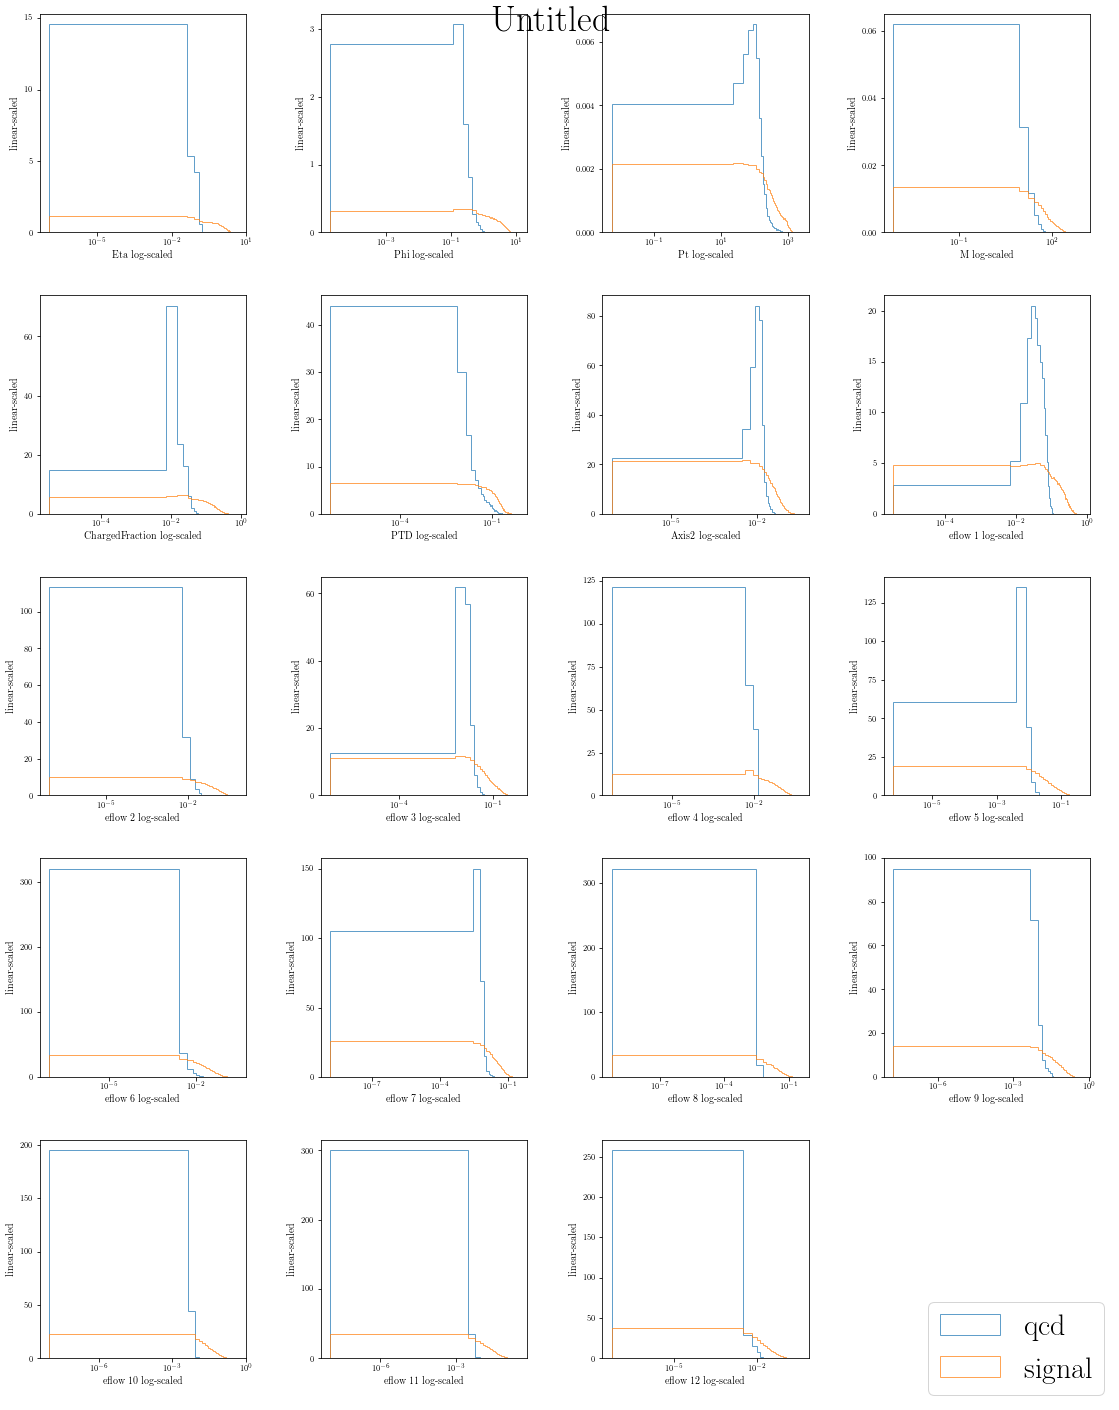

In [159]:
utils.data_table(qcd_mae, name='qcd').plot(utils.data_table(signal_mae, name='signal'), normed=1, bins=100, xscale='log')